# Kmeansによる社説のクラスタリング

In [29]:
from sklearn.cluster import KMeans
import numpy as np

In [30]:
#vec_arrayにすべての文書ベクトルを定義する処理
vec_array = np.zeros((2816,100)) #0初期化、2816ファイル×100語の基底ベクトル

#文書ベクトルはそれぞれ0.txt～2816.txtファイルで定義されている、既にtf*idfは取得済
file_num=0
i=0
while file_num<2816:
    f=open(str(file_num)+'.txt','r',encoding="utf-8")
    for line in f:
        vec, word = line.split(' ')
        vec_array[file_num][i]=vec
        i += 1
        
    f.close()
    file_num += 1
    i=0

In [54]:
pred = KMeans(n_clusters=100, init='random').fit_predict(vec_array) #まずはrandomで初期化してやってみる

In [55]:
pred_pp = KMeans(n_clusters=100,init='k-means++').fit_predict(vec_array) #K-means++で初期化してやってみる

# データの可視化

In [33]:
# 準備作業
list=[[] for j in range(100)]

In [56]:
#クラスタごとのキーワードをいくつか決める処理(random初期化の結果の方)
for i in range(2816):
    cluster=pred[i]
    f=open('../head_100/'+str(i)+'.txt','r',encoding="utf-8")
    for j in range(10):
        line = f.readline()
        vec, word = line.split(' ')
        word = ''.join(word.splitlines())
        list[cluster].append(word)     
    f.close()

In [57]:
# 準備作業
list2=[[] for j in range(100)]

In [59]:
#クラスタごとのキーワードを取る処理(kmeans++の方)
for i in range(2816):
    cluster=pred_pp[i]
    f=open('../head_100/'+str(i)+'.txt','r',encoding="utf-8")
    for j in range(10):
        line = f.readline()
        vec, word = line.split(' ')
        word = ''.join(word.splitlines())
        list2[cluster].append(word)     
    f.close()

## WordCloudによる可視化

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 左がRandom 右がKmeans++

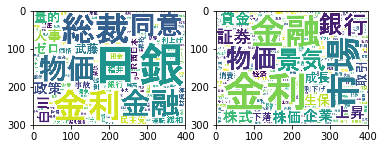

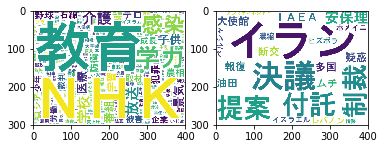

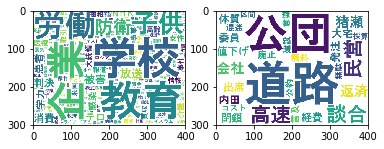

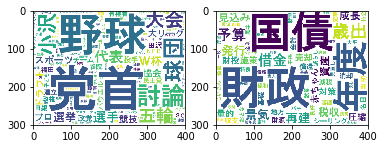

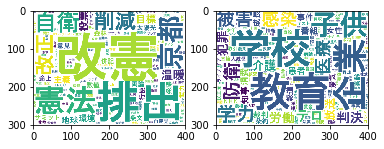

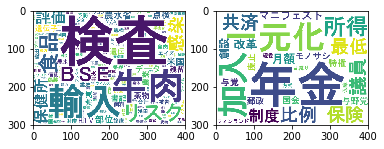

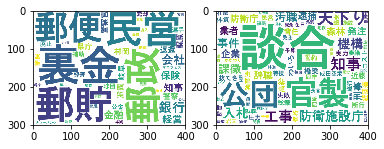

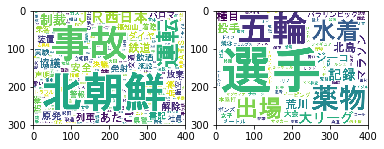

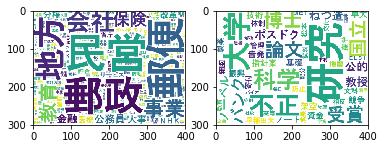

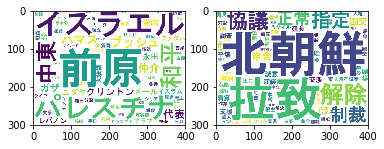

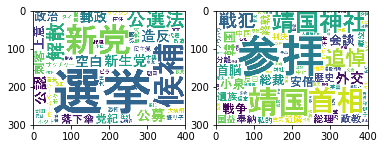

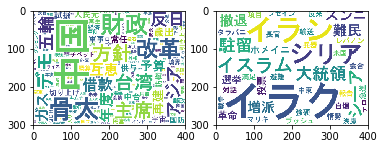

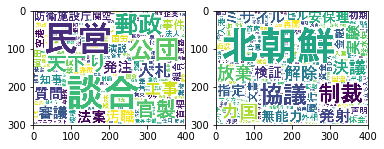

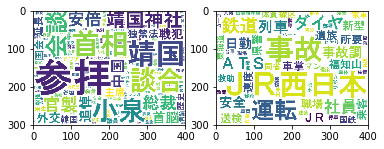

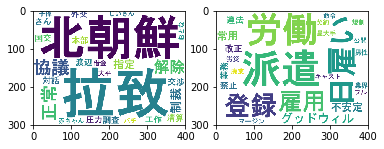

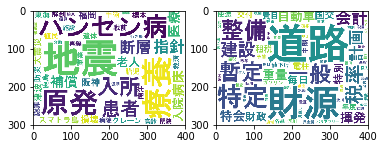

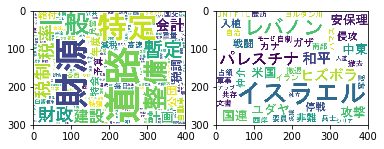

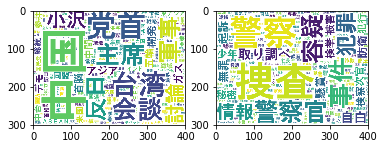

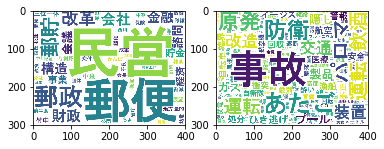

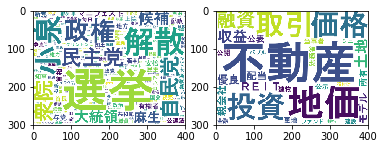

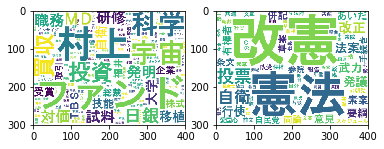

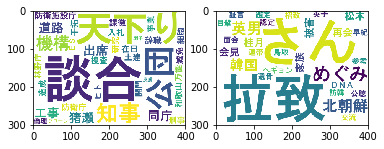

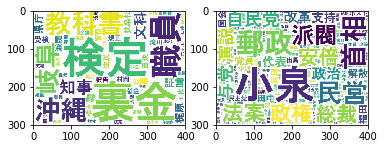

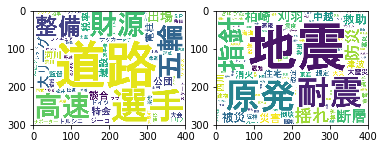

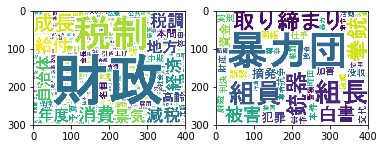

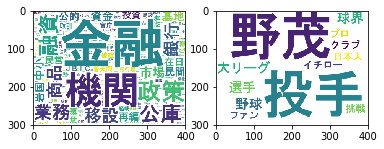

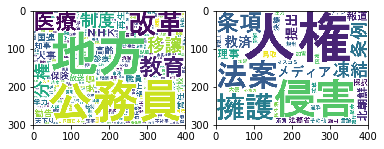

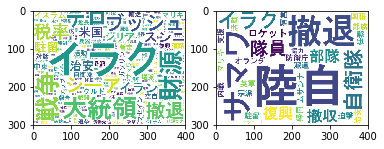

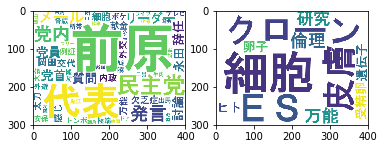

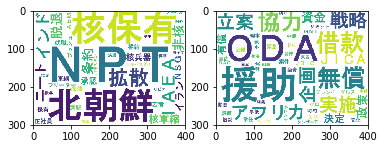

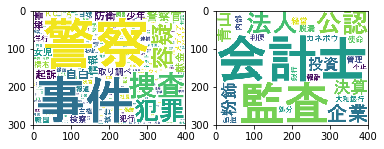

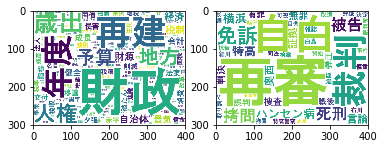

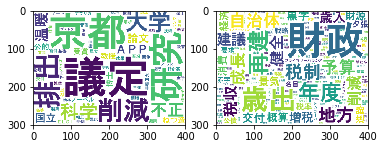

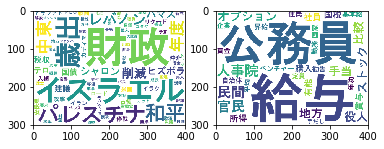

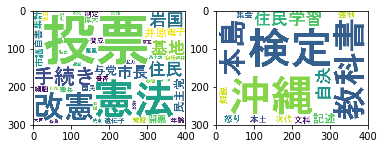

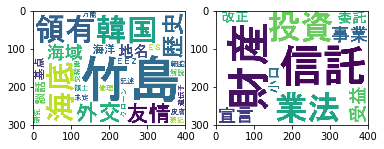

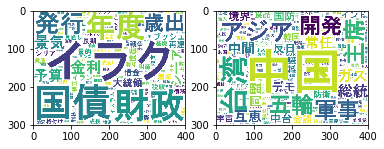

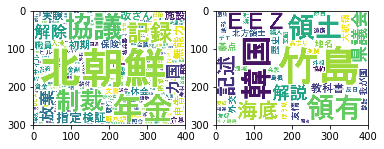

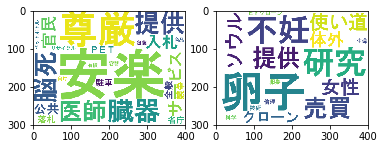

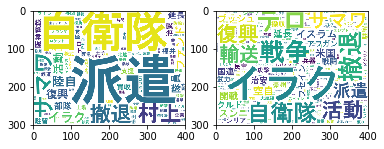

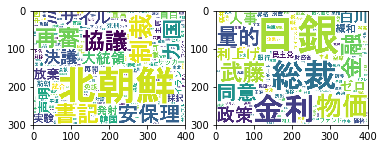

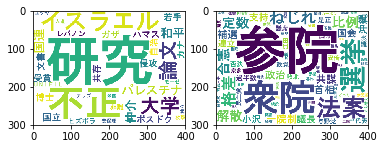

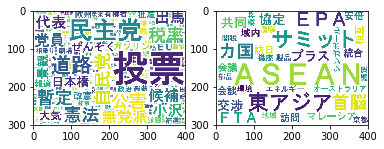

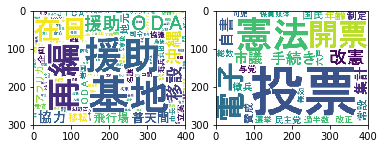

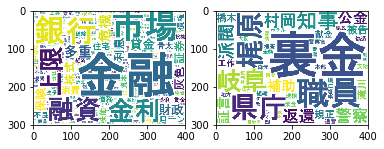

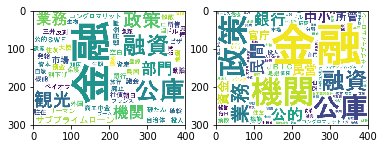

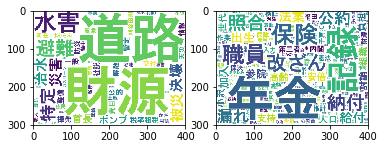

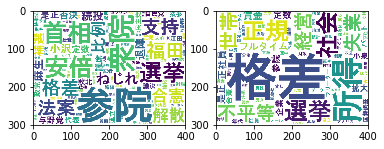

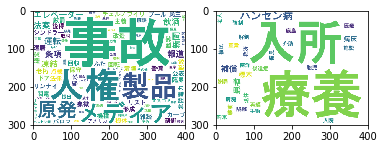

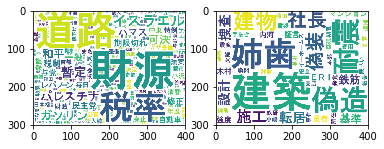

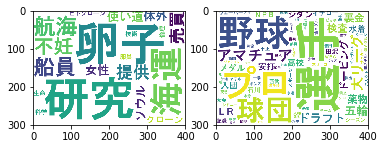

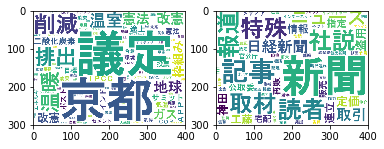

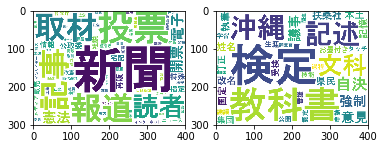

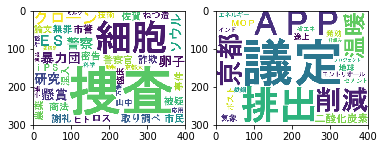

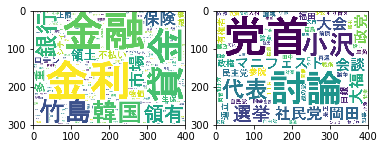

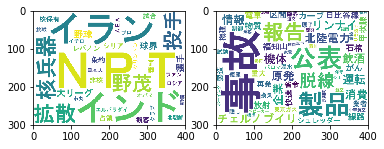

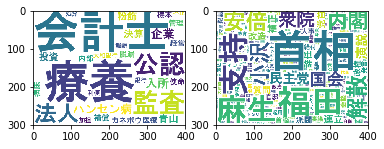

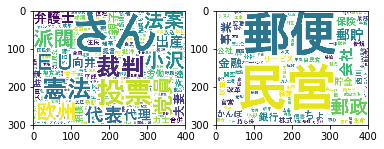

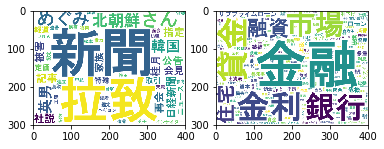

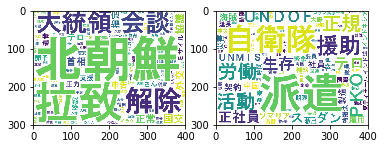

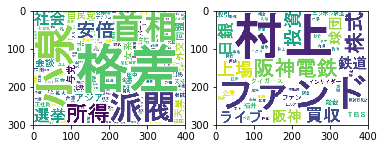

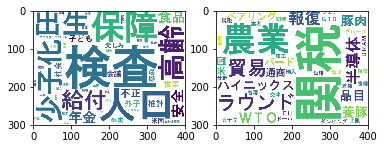

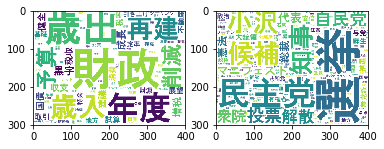

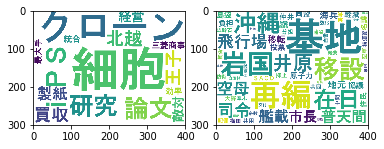

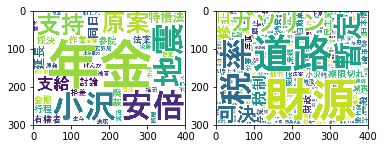

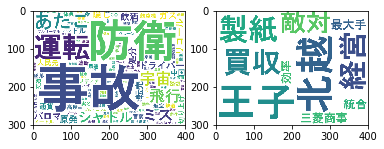

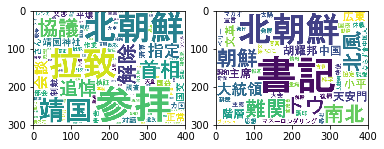

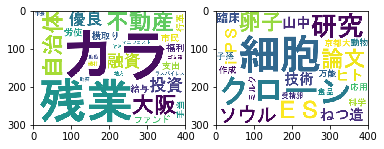

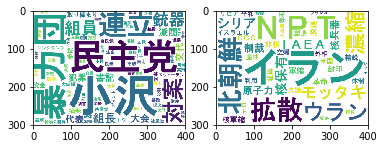

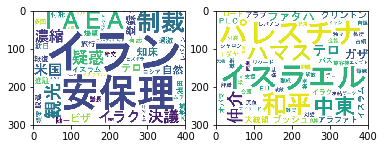

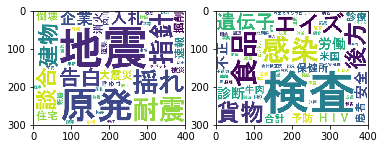

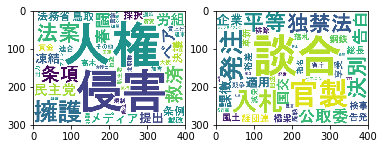

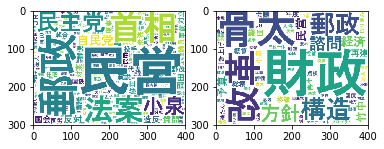

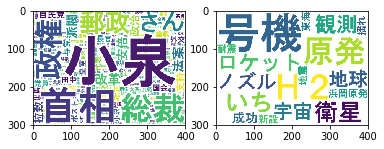

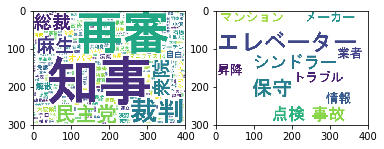

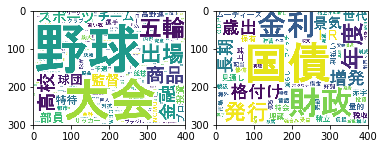

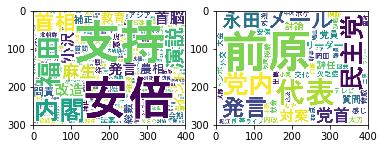

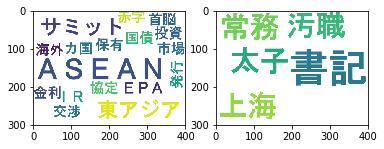

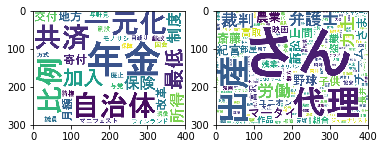

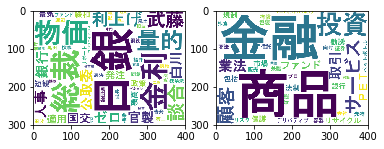

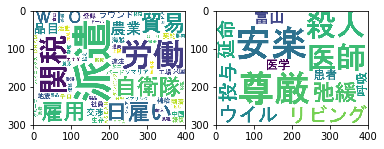

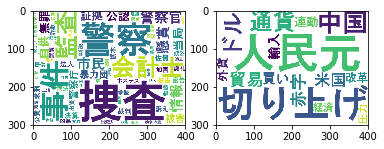

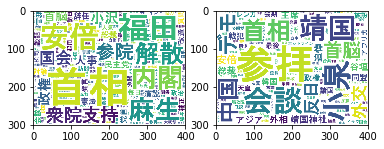

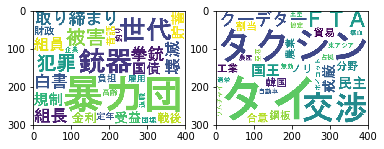

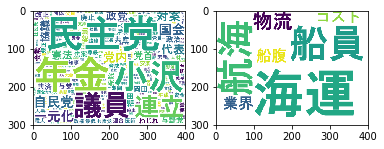

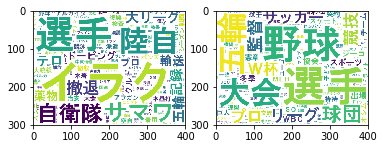

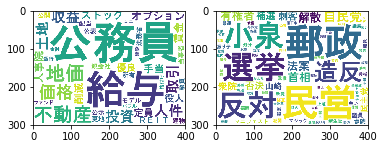

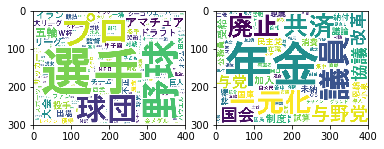

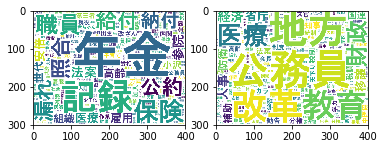

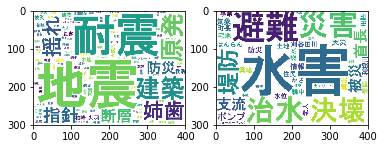

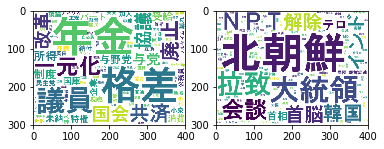

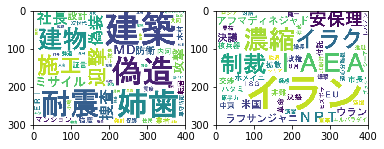

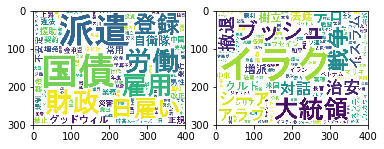

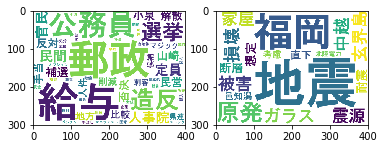

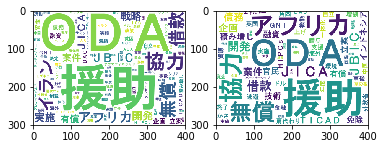

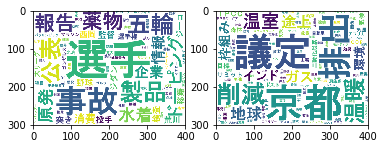

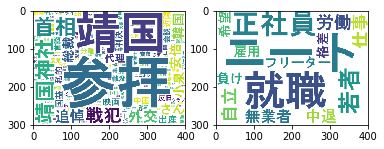

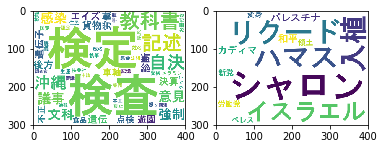

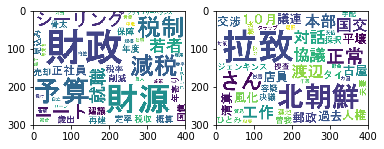

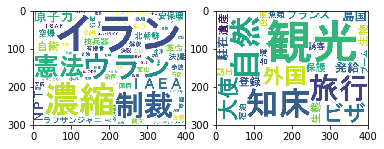

In [61]:
keywords=""
keywords2=""
for i in range(100):
    keywords =  ' '.join(list[i])
    word_cloud = WordCloud(background_color="white",font_path="./HGRGE.TTC",width=400,height=300).generate(keywords)
    keywords2 =  ' '.join(list2[i])
    word_cloud2 = WordCloud(background_color="white",font_path="./HGRGE.TTC",width=400,height=300).generate(keywords2)
    f,axarr = plt.subplots(1,2)
    axarr[0].imshow(word_cloud)
    axarr[1].imshow(word_cloud2)
    plt.show()
    keywords=""
    keywords2=""

In [75]:
list = [0]*100
for i in range(2816):
    list[pred[i]]+=1
list

[26,
 15,
 1013,
 11,
 13,
 21,
 6,
 61,
 19,
 10,
 1,
 10,
 16,
 21,
 1,
 6,
 24,
 64,
 7,
 61,
 7,
 1,
 7,
 6,
 41,
 33,
 112,
 51,
 10,
 8,
 63,
 33,
 10,
 12,
 8,
 1,
 20,
 30,
 2,
 15,
 33,
 3,
 23,
 22,
 88,
 3,
 6,
 18,
 8,
 40,
 2,
 27,
 9,
 4,
 11,
 2,
 4,
 20,
 7,
 20,
 13,
 5,
 19,
 1,
 2,
 2,
 15,
 3,
 6,
 6,
 2,
 7,
 27,
 44,
 8,
 25,
 2,
 1,
 4,
 4,
 6,
 11,
 95,
 2,
 51,
 11,
 4,
 25,
 55,
 22,
 15,
 11,
 13,
 7,
 24,
 8,
 16,
 7,
 2,
 9]

In [78]:
list2 = [0]*100
for i in range(2816):
    list2[pred_pp[i]]+=1
list2

[89,
 3,
 5,
 17,
 1089,
 4,
 14,
 10,
 10,
 16,
 18,
 7,
 54,
 12,
 6,
 21,
 8,
 46,
 45,
 4,
 13,
 7,
 58,
 21,
 6,
 2,
 8,
 6,
 2,
 10,
 4,
 8,
 44,
 5,
 3,
 1,
 60,
 9,
 2,
 41,
 26,
 17,
 6,
 4,
 7,
 19,
 55,
 13,
 5,
 11,
 15,
 9,
 6,
 4,
 11,
 10,
 103,
 26,
 45,
 12,
 9,
 5,
 94,
 16,
 45,
 1,
 8,
 4,
 7,
 13,
 8,
 6,
 13,
 2,
 2,
 12,
 10,
 1,
 21,
 7,
 2,
 2,
 25,
 4,
 1,
 27,
 22,
 14,
 121,
 6,
 25,
 8,
 21,
 2,
 14,
 32,
 2,
 2,
 7,
 3]